# 1. Data loading

In [1]:
import os

if os.getcwd().split("\\")[-1] != "dataset2":
    os.chdir("dataset2")

In [2]:
import pandas as pd
from os.path import join

MAIN_DIR = os.getcwd()


data = pd.DataFrame()
for file in os.listdir(MAIN_DIR):
    if file.endswith(".csv"):
        try:
            file_path = join(MAIN_DIR, file)
            df = pd.read_csv(file_path, index_col="datetime")
            data = pd.concat([data, df])
        except Exception:
            print(file_path)
            sys.exit()
data = data.sort_index()
data.drop(columns="Unnamed: 0", inplace=True)
print(data.shape)
data

(18262, 32)


,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
1974-01-01,"Coventry, England, United Kingdom",-0.9,-4.8,-2.4,-3.0,-10.5,-5.5,-2.8,96.9,0.000,...,NaN,NaN,NaN,1974-01-01T08:16:29,1974-01-01T16:02:46,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03462099999,03354099999,03534099999,03649099999"
1974-01-02,"Coventry, England, United Kingdom",1.0,-3.9,-1.0,-3.6,-7.9,-5.2,-2.3,90.8,0.000,...,NaN,NaN,NaN,1974-01-02T08:16:20,1974-01-02T16:03:51,0.30,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03462099999,03354099999,03534099999,03649099999"
1974-01-03,"Coventry, England, United Kingdom",5.0,1.0,2.3,1.0,-3.5,-1.9,0.8,90.1,0.182,...,NaN,NaN,NaN,1974-01-03T08:16:09,1974-01-03T16:04:59,0.33,"Snow, Rain, Overcast",Cloudy skies throughout the day with afternoon...,rain,"03462099999,03354099999,03534099999,03649099999"
1974-01-04,"Coventry, England, United Kingdom",9.0,4.9,7.2,4.8,1.0,2.9,6.0,92.1,0.182,...,NaN,NaN,NaN,1974-01-04T08:15:54,1974-01-04T16:06:10,0.36,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"03462099999,03354099999,03534099999,03649099999"
1974-01-05,"Coventry, England, United Kingdom",9.9,7.9,8.5,6.7,2.9,4.5,6.7,88.6,3.036,...,NaN,NaN,NaN,1974-01-05T08:15:35,1974-01-05T16:07:24,0.40,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"03462099999,03354099999,03534099999,03649099999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,"Coventry, England, United Kingdom",11.9,5.1,9.0,11.9,1.9,7.0,7.3,89.1,13.304,...,0.4,0.0,10.0,2023-12-27T08:16:10,2023-12-27T15:57:56,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03529099999,E7347,EGBB,03647099999,03535099999..."
2023-12-28,"Coventry, England, United Kingdom",10.7,8.6,9.6,10.7,5.9,7.5,6.2,79.8,10.321,...,0.9,1.0,10.0,2023-12-28T08:16:20,2023-12-28T15:58:45,0.55,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03529099999,E7347,EGBB,03647099999,03535099999..."
2023-12-29,"Coventry, England, United Kingdom",8.6,4.9,6.7,5.9,2.2,4.1,3.3,79.2,1.013,...,0.8,1.0,10.0,2023-12-29T08:16:27,2023-12-29T15:59:38,0.58,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03529099999,E7347,EGBB,03647099999,03535099999..."


In [3]:
print(data.isna().sum())

name                    0
tempmax                 0
tempmin                 0
temp                    0
feelslikemax            0
feelslikemin            0
feelslike               0
dew                     0
humidity                0
precip                  1
precipprob              0
precipcover             0
preciptype           6802
snow                14976
snowdepth           13227
windgust            14179
windspeed               0
winddir                 0
sealevelpressure        1
cloudcover              5
visibility              0
solarradiation      13149
solarenergy         13149
uvindex             13149
severerisk          17541
sunrise                 0
sunset                  0
moonphase               0
conditions              0
description             0
icon                    0
stations                0
dtype: int64


In [4]:
data.columns

Index(['name', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [5]:
keep_cols = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset',
       'moonphase', 'conditions']

weather = data[keep_cols]
weather

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions
datetime,,,,,,,,,,,,,,,,,,,,,
1974-01-01,-0.9,-4.8,-2.4,-3.0,-10.5,-5.5,-2.8,96.9,0.000,0,...,59.6,1.1,NaN,NaN,NaN,NaN,1974-01-01T08:16:29,1974-01-01T16:02:46,0.25,Partially cloudy
1974-01-02,1.0,-3.9,-1.0,-3.6,-7.9,-5.2,-2.3,90.8,0.000,0,...,85.5,4.9,NaN,NaN,NaN,NaN,1974-01-02T08:16:20,1974-01-02T16:03:51,0.30,Partially cloudy
1974-01-03,5.0,1.0,2.3,1.0,-3.5,-1.9,0.8,90.1,0.182,100,...,99.1,6.3,NaN,NaN,NaN,NaN,1974-01-03T08:16:09,1974-01-03T16:04:59,0.33,"Snow, Rain, Overcast"
1974-01-04,9.0,4.9,7.2,4.8,1.0,2.9,6.0,92.1,0.182,100,...,87.4,10.3,NaN,NaN,NaN,NaN,1974-01-04T08:15:54,1974-01-04T16:06:10,0.36,"Rain, Partially cloudy"
1974-01-05,9.9,7.9,8.5,6.7,2.9,4.5,6.7,88.6,3.036,100,...,91.8,13.6,NaN,NaN,NaN,NaN,1974-01-05T08:15:35,1974-01-05T16:07:24,0.40,"Rain, Overcast"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,11.9,5.1,9.0,11.9,1.9,7.0,7.3,89.1,13.304,100,...,85.1,16.7,3.4,0.4,0.0,10.0,2023-12-27T08:16:10,2023-12-27T15:57:56,0.50,"Rain, Partially cloudy"
2023-12-28,10.7,8.6,9.6,10.7,5.9,7.5,6.2,79.8,10.321,100,...,79.7,16.7,10.5,0.9,1.0,10.0,2023-12-28T08:16:20,2023-12-28T15:58:45,0.55,"Rain, Partially cloudy"
2023-12-29,8.6,4.9,6.7,5.9,2.2,4.1,3.3,79.2,1.013,100,...,49.7,30.6,10.6,0.8,1.0,10.0,2023-12-29T08:16:27,2023-12-29T15:59:38,0.58,"Rain, Partially cloudy"


# 2. EDA

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
weather.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions
datetime,,,,,,,,,,,,,,,,,,,,,,,,,
1974-01-01,-0.9,-4.8,-2.4,-3.0,-10.5,-5.5,-2.8,96.9,0.000,0,0.00,NaN,16.7,156.2,1026.8,59.6,1.1,NaN,NaN,NaN,NaN,1974-01-01T08:16:29,1974-01-01T16:02:46,0.25,Partially cloudy
1974-01-02,1.0,-3.9,-1.0,-3.6,-7.9,-5.2,-2.3,90.8,0.000,0,0.00,NaN,19.4,150.7,1014.6,85.5,4.9,NaN,NaN,NaN,NaN,1974-01-02T08:16:20,1974-01-02T16:03:51,0.30,Partially cloudy
1974-01-03,5.0,1.0,2.3,1.0,-3.5,-1.9,0.8,90.1,0.182,100,4.17,NaN,23.0,144.0,1003.0,99.1,6.3,NaN,NaN,NaN,NaN,1974-01-03T08:16:09,1974-01-03T16:04:59,0.33,"Snow, Rain, Overcast"
1974-01-04,9.0,4.9,7.2,4.8,1.0,2.9,6.0,92.1,0.182,100,4.17,NaN,45.0,160.3,1002.3,87.4,10.3,NaN,NaN,NaN,NaN,1974-01-04T08:15:54,1974-01-04T16:06:10,0.36,"Rain, Partially cloudy"
1974-01-05,9.9,7.9,8.5,6.7,2.9,4.5,6.7,88.6,3.036,100,8.33,NaN,48.2,158.9,997.7,91.8,13.6,NaN,NaN,NaN,NaN,1974-01-05T08:15:35,1974-01-05T16:07:24,0.40,"Rain, Overcast"


### Term Explanation

- **tempmax**:     Maximum temperature in a day, (°C)
- **tempmin**:     Minimum temperature in a day, in (°C)
- **temp**:     The overall temperature of the day, in (°C)
- **feelslikemin/feelslikemin/feelslike**:     A measurement of how hot or cold it really feels like outside (°C)
- **dew**:     The temperature at which droplets form (°C)
- **humidity**:     The concentration of water vapor present in the air (%)
- **precip**:     Precipitation (mm)
- **precipprob**:     Probability of precipitation (%)
- **precipcover**:     Percentage of precipitation cover (%)
- **preciptype**:     Type of precipitation (rain, snow, etc.)
- **windgust**:     Wind gust speed (kph)
- **windspeed**:     Wind speed (kph)
- **windir**:     Direction of wind (°)
- **sealevelpressure**:     Pressure in sea level (mb)
- **cloudcover**:     Cloud cover (%)
- **visibility**:     Visibility (%)
- **solarradiation**:     Solar radiation (W/m2)
- **solarenerg**:     Solar energy (MJ/m2)
- **uvindex**:     UV index (None)
- **severerisk**:     Servere risk (None)


In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18262 entries, 1974-01-01 to 2023-12-31
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           18262 non-null  float64
 1   tempmin           18262 non-null  float64
 2   temp              18262 non-null  float64
 3   feelslikemax      18262 non-null  float64
 4   feelslikemin      18262 non-null  float64
 5   feelslike         18262 non-null  float64
 6   dew               18262 non-null  float64
 7   humidity          18262 non-null  float64
 8   precip            18261 non-null  float64
 9   precipprob        18262 non-null  int64  
 10  precipcover       18262 non-null  float64
 11  windgust          4083 non-null   float64
 12  windspeed         18262 non-null  float64
 13  winddir           18262 non-null  float64
 14  sealevelpressure  18261 non-null  float64
 15  cloudcover        18257 non-null  float64
 16  visibility        18262 non-nul

In [9]:
weather.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,18262.000000,18262.000000,18262.000000,18262.000000,18262.000000,18262.00000,18262.000000,18262.000000,18261.000000,18262.000000,18262.000000,4083.000000,18262.000000,18262.000000,18261.000000,18257.000000,18262.000000,5113.000000,5113.000000,5113.000000,721.000000,18262.000000
mean,13.431366,6.293582,9.879663,12.643144,4.601342,8.60673,6.425183,80.781399,1.184713,62.205673,5.265829,41.645996,21.394250,196.207135,1014.706604,66.995010,17.059227,122.990534,10.613221,4.317426,10.277393,0.482952
std,6.232363,5.032552,5.392911,7.210517,6.142939,6.55956,4.728333,9.116106,2.825294,48.488661,7.381037,14.240177,8.470924,92.355149,11.035186,21.816224,8.120805,93.773502,8.105731,2.554562,3.105667,0.288565
min,-6.800000,-19.300000,-13.500000,-11.300000,-19.300000,-14.00000,-15.700000,37.800000,0.000000,0.000000,0.000000,7.600000,0.700000,0.000000,960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,8.925000,2.600000,5.900000,6.600000,-0.100000,3.40000,2.900000,74.500000,0.000000,0.000000,0.000000,30.200000,15.400000,138.700000,1008.100000,52.500000,11.000000,39.900000,3.400000,2.000000,10.000000,0.250000
50%,13.100000,6.500000,9.900000,13.100000,4.500000,8.90000,6.600000,81.300000,0.088000,100.000000,4.170000,41.700000,20.300000,211.400000,1015.600000,70.100000,16.900000,101.100000,8.700000,4.000000,10.000000,0.500000
75%,18.000000,10.200000,14.100000,18.000000,10.200000,14.10000,10.000000,87.900000,0.940000,100.000000,8.330000,51.800000,26.000000,260.475000,1022.300000,84.700000,22.400000,192.000000,16.600000,6.000000,10.000000,0.750000
max,37.700000,19.800000,28.400000,36.500000,19.800000,27.90000,20.300000,100.000000,50.392000,100.000000,100.000000,103.700000,91.600000,359.900000,1047.100000,100.000000,52.400000,580.100000,50.100000,10.000000,60.000000,0.980000


In [10]:
weather.isna().sum()

tempmax                 0
tempmin                 0
temp                    0
feelslikemax            0
feelslikemin            0
feelslike               0
dew                     0
humidity                0
precip                  1
precipprob              0
precipcover             0
windgust            14179
windspeed               0
winddir                 0
sealevelpressure        1
cloudcover              5
visibility              0
solarradiation      13149
solarenergy         13149
uvindex             13149
severerisk          17541
sunrise                 0
sunset                  0
moonphase               0
conditions              0
dtype: int64

- Data about the sunlight/intensity have the same number of missing value
- Wind gust speed and severe risk attribute has many missing data

## 2.1 Univariate Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
weather.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions
datetime,,,,,,,,,,,,,,,,,,,,,,,,,
1974-01-01,-0.9,-4.8,-2.4,-3.0,-10.5,-5.5,-2.8,96.9,0.000,0,0.00,NaN,16.7,156.2,1026.8,59.6,1.1,NaN,NaN,NaN,NaN,1974-01-01T08:16:29,1974-01-01T16:02:46,0.25,Partially cloudy
1974-01-02,1.0,-3.9,-1.0,-3.6,-7.9,-5.2,-2.3,90.8,0.000,0,0.00,NaN,19.4,150.7,1014.6,85.5,4.9,NaN,NaN,NaN,NaN,1974-01-02T08:16:20,1974-01-02T16:03:51,0.30,Partially cloudy
1974-01-03,5.0,1.0,2.3,1.0,-3.5,-1.9,0.8,90.1,0.182,100,4.17,NaN,23.0,144.0,1003.0,99.1,6.3,NaN,NaN,NaN,NaN,1974-01-03T08:16:09,1974-01-03T16:04:59,0.33,"Snow, Rain, Overcast"
1974-01-04,9.0,4.9,7.2,4.8,1.0,2.9,6.0,92.1,0.182,100,4.17,NaN,45.0,160.3,1002.3,87.4,10.3,NaN,NaN,NaN,NaN,1974-01-04T08:15:54,1974-01-04T16:06:10,0.36,"Rain, Partially cloudy"
1974-01-05,9.9,7.9,8.5,6.7,2.9,4.5,6.7,88.6,3.036,100,8.33,NaN,48.2,158.9,997.7,91.8,13.6,NaN,NaN,NaN,NaN,1974-01-05T08:15:35,1974-01-05T16:07:24,0.40,"Rain, Overcast"


In [13]:
weather.nunique()

tempmax               365
tempmin               303
temp                  320
feelslikemax          414
feelslikemin          338
feelslike             365
dew                   273
humidity              497
precip               4085
precipprob              2
precipcover            24
windgust              569
windspeed             553
winddir              3509
sealevelpressure      677
cloudcover            981
visibility            446
solarradiation       2387
solarenergy           329
uvindex                11
severerisk              3
sunrise             18262
sunset              18262
moonphase              96
conditions             14
dtype: int64

### 2.1.1 Missing Data

In [14]:
weather.uvindex.value_counts()

uvindex
2.0     763
1.0     756
3.0     612
5.0     549
6.0     537
4.0     529
7.0     512
8.0     501
9.0     238
0.0     102
10.0     14
Name: count, dtype: int64

In [15]:
weather["severerisk"].value_counts()

severerisk
10.0    714
30.0      5
60.0      2
Name: count, dtype: int64

In [16]:
weather.precipprob.value_counts()

precipprob
100    11360
0       6902
Name: count, dtype: int64

In [17]:
weather.precipcover.value_counts()

precipcover
0.00      6902
4.17      5175
8.33      3817
12.50     1459
16.67      546
20.83       49
37.50       40
29.17       34
33.33       33
41.67       30
25.00       28
45.83       28
50.00       26
54.17       20
62.50       15
58.33       15
66.67       12
75.00       10
70.83        9
79.17        4
87.50        3
91.67        3
100.00       2
83.33        2
Name: count, dtype: int64

- The data of severe risk doesn't seems to be useful because there are to many 10.0
- Precipitation probability might not be useful but it is unnecessary
- ==> can remove these column

In [18]:
weather.drop(columns=["severerisk", "precipprob"], inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5768\2814690841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather.drop(columns=["severerisk", "precipprob"], inplace=True)


- precipitation and precipitation cover column needed to clean (outlier)
- Most data follows a normal distribution
- Some data has an equal distribution like UVIndex and moonphase.

### 2.1.2 Categoric data

In [19]:
categoric = weather.select_dtypes(exclude="number")
categoric

,sunrise,sunset,conditions
datetime,,,
1974-01-01,1974-01-01T08:16:29,1974-01-01T16:02:46,Partially cloudy
1974-01-02,1974-01-02T08:16:20,1974-01-02T16:03:51,Partially cloudy
1974-01-03,1974-01-03T08:16:09,1974-01-03T16:04:59,"Snow, Rain, Overcast"
1974-01-04,1974-01-04T08:15:54,1974-01-04T16:06:10,"Rain, Partially cloudy"
1974-01-05,1974-01-05T08:15:35,1974-01-05T16:07:24,"Rain, Overcast"
...,...,...,...
2023-12-27,2023-12-27T08:16:10,2023-12-27T15:57:56,"Rain, Partially cloudy"
2023-12-28,2023-12-28T08:16:20,2023-12-28T15:58:45,"Rain, Partially cloudy"
2023-12-29,2023-12-29T08:16:27,2023-12-29T15:59:38,"Rain, Partially cloudy"


In [20]:
#Convert datetime of sunrise and sunset
categoric["sunrise"] = pd.to_datetime(categoric.sunrise)
categoric["sunrise"] = categoric["sunrise"].dt.strftime('%H:%M')
categoric["sunset"] = pd.to_datetime(categoric.sunset)
categoric["sunset"] = categoric["sunset"].dt.strftime('%H:%M')

categoric

,sunrise,sunset,conditions
datetime,,,
1974-01-01,08:16,16:02,Partially cloudy
1974-01-02,08:16,16:03,Partially cloudy
1974-01-03,08:16,16:04,"Snow, Rain, Overcast"
1974-01-04,08:15,16:06,"Rain, Partially cloudy"
1974-01-05,08:15,16:07,"Rain, Overcast"
...,...,...,...
2023-12-27,08:16,15:57,"Rain, Partially cloudy"
2023-12-28,08:16,15:58,"Rain, Partially cloudy"
2023-12-29,08:16,15:59,"Rain, Partially cloudy"


In [21]:
categoric.nunique()

sunrise       215
sunset        341
conditions     14
dtype: int64

In [22]:
weather["sunrise"] = pd.to_datetime(weather.sunrise)
weather["sunrise"] = weather["sunrise"].dt.strftime('%H:%M')
weather["sunset"] = pd.to_datetime(weather.sunset)
weather["sunset"] = weather["sunset"].dt.strftime('%H:%M')

weather.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5768\2950433844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather["sunrise"] = pd.to_datetime(weather.sunrise)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5768\2950433844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather["sunrise"] = weather["sunrise"].dt.strftime('%H:%M')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5768\2950433844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
datetime,,,,,,,,,,,,,,,,,,,,,,,
1974-01-01,-0.9,-4.8,-2.4,-3.0,-10.5,-5.5,-2.8,96.9,0.000,0.00,NaN,16.7,156.2,1026.8,59.6,1.1,NaN,NaN,NaN,08:16,16:02,0.25,Partially cloudy
1974-01-02,1.0,-3.9,-1.0,-3.6,-7.9,-5.2,-2.3,90.8,0.000,0.00,NaN,19.4,150.7,1014.6,85.5,4.9,NaN,NaN,NaN,08:16,16:03,0.30,Partially cloudy
1974-01-03,5.0,1.0,2.3,1.0,-3.5,-1.9,0.8,90.1,0.182,4.17,NaN,23.0,144.0,1003.0,99.1,6.3,NaN,NaN,NaN,08:16,16:04,0.33,"Snow, Rain, Overcast"
1974-01-04,9.0,4.9,7.2,4.8,1.0,2.9,6.0,92.1,0.182,4.17,NaN,45.0,160.3,1002.3,87.4,10.3,NaN,NaN,NaN,08:15,16:06,0.36,"Rain, Partially cloudy"
1974-01-05,9.9,7.9,8.5,6.7,2.9,4.5,6.7,88.6,3.036,8.33,NaN,48.2,158.9,997.7,91.8,13.6,NaN,NaN,NaN,08:15,16:07,0.40,"Rain, Overcast"


In [23]:
def convert_time(time_str):
    # Split the time string into hours, minutes, and seconds
    hours, minutes = map(int, time_str.split(':'))
    
    # Calculate the total number of seconds since midnight
    total_hour = hours + minutes/60
    
    return total_hour

# Apply the conversion function to the 'sunrise' column
weather['sunrise'] = weather['sunrise'].apply(convert_time)
weather['sunset'] = weather['sunset'].apply(convert_time)

weather.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5768\352008646.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['sunrise'] = weather['sunrise'].apply(convert_time)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5768\352008646.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['sunset'] = weather['sunset'].apply(convert_time)


,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
datetime,,,,,,,,,,,,,,,,,,,,,,,
1974-01-01,-0.9,-4.8,-2.4,-3.0,-10.5,-5.5,-2.8,96.9,0.000,0.00,NaN,16.7,156.2,1026.8,59.6,1.1,NaN,NaN,NaN,8.266667,16.033333,0.25,Partially cloudy
1974-01-02,1.0,-3.9,-1.0,-3.6,-7.9,-5.2,-2.3,90.8,0.000,0.00,NaN,19.4,150.7,1014.6,85.5,4.9,NaN,NaN,NaN,8.266667,16.050000,0.30,Partially cloudy
1974-01-03,5.0,1.0,2.3,1.0,-3.5,-1.9,0.8,90.1,0.182,4.17,NaN,23.0,144.0,1003.0,99.1,6.3,NaN,NaN,NaN,8.266667,16.066667,0.33,"Snow, Rain, Overcast"
1974-01-04,9.0,4.9,7.2,4.8,1.0,2.9,6.0,92.1,0.182,4.17,NaN,45.0,160.3,1002.3,87.4,10.3,NaN,NaN,NaN,8.250000,16.100000,0.36,"Rain, Partially cloudy"
1974-01-05,9.9,7.9,8.5,6.7,2.9,4.5,6.7,88.6,3.036,8.33,NaN,48.2,158.9,997.7,91.8,13.6,NaN,NaN,NaN,8.250000,16.116667,0.40,"Rain, Overcast"


In [24]:
list_conditions = []

for condition in weather.conditions.unique():
    for i in condition.split(", "):
        if i not in list_conditions:
            list_conditions.append(i)

list_conditions.sort()
print(list_conditions)

['Clear', 'Fog', 'Overcast', 'Partially cloudy', 'Rain', 'Snow']


In [25]:
conditions = weather[["conditions"]]

conditions["conditions"] = conditions["conditions"].str.split(", ")
exploded = conditions.explode("conditions")
exploded.reset_index()
value_counts = exploded['conditions'].value_counts().sort_index()

value_counts


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5768\2142778648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conditions["conditions"] = conditions["conditions"].str.split(", ")


conditions
Clear                 422
Fog                     2
Overcast             2841
Partially cloudy    14844
Rain                11283
Snow                 1063
Name: count, dtype: int64

- Each field can have multiple conditions --> data need to be One-hot encoded
- It is partially cloudy or rain most of the day
- Unbalance data

### 2.1.3 Numeric data

In [26]:
weather.precip.describe()

count    18261.000000
mean         1.184713
std          2.825294
min          0.000000
25%          0.000000
50%          0.088000
75%          0.940000
max         50.392000
Name: precip, dtype: float64

In [27]:
weather[(weather.precip < 40) & (weather.precip > 1)].precip.describe()

count    4374.000000
mean        4.469981
std         4.232314
min         1.001000
25%         1.716000
50%         2.967500
75%         5.590000
max        32.066000
Name: precip, dtype: float64

--> The precipitation is around 0-1 mm

In [28]:
weather.precipcover.unique()

array([  0.  ,   4.17,   8.33,  12.5 ,  16.67,  20.83,  25.  ,  54.17,
        37.5 ,  41.67,  45.83,  58.33,  62.5 ,  70.83,  29.17,  50.  ,
        75.  ,  33.33,  66.67,  87.5 , 100.  ,  83.33,  79.17,  91.67])

In [29]:
weather[weather.precipcover != 0].precipcover.describe()

count    11360.000000
mean         8.465191
std          7.778000
min          4.170000
25%          4.170000
50%          8.330000
75%          8.330000
max        100.000000
Name: precipcover, dtype: float64

- Precip and precipcover are not evenly distributed, mainly hover around low values

### 2.1.4 Plotting graphs

In [30]:
numeric = weather.select_dtypes(include='number')

In [31]:
numeric.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase
count,18262.000000,18262.000000,18262.000000,18262.000000,18262.000000,18262.00000,18262.000000,18262.000000,18261.000000,18262.000000,4083.000000,18262.000000,18262.000000,18261.000000,18257.000000,18262.000000,5113.000000,5113.000000,5113.000000,18262.000000,18262.000000,18262.000000
mean,13.431366,6.293582,9.879663,12.643144,4.601342,8.60673,6.425183,80.781399,1.184713,5.265829,41.645996,21.394250,196.207135,1014.706604,66.995010,17.059227,122.990534,10.613221,4.317426,6.539273,18.819200,0.482952
std,6.232363,5.032552,5.392911,7.210517,6.142939,6.55956,4.728333,9.116106,2.825294,7.381037,14.240177,8.470924,92.355149,11.035186,21.816224,8.120805,93.773502,8.105731,2.554562,1.152983,1.996441,0.288565
min,-6.800000,-19.300000,-13.500000,-11.300000,-19.300000,-14.00000,-15.700000,37.800000,0.000000,0.000000,7.600000,0.700000,0.000000,960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000,15.866667,0.000000
25%,8.925000,2.600000,5.900000,6.600000,-0.100000,3.40000,2.900000,74.500000,0.000000,0.000000,30.200000,15.400000,138.700000,1008.100000,52.500000,11.000000,39.900000,3.400000,2.000000,5.483333,16.733333,0.250000
50%,13.100000,6.500000,9.900000,13.100000,4.500000,8.90000,6.600000,81.300000,0.088000,4.170000,41.700000,20.300000,211.400000,1015.600000,70.100000,16.900000,101.100000,8.700000,4.000000,6.616667,18.966667,0.500000
75%,18.000000,10.200000,14.100000,18.000000,10.200000,14.10000,10.000000,87.900000,0.940000,8.330000,51.800000,26.000000,260.475000,1022.300000,84.700000,22.400000,192.000000,16.600000,6.000000,7.566667,20.750000,0.750000
max,37.700000,19.800000,28.400000,36.500000,19.800000,27.90000,20.300000,100.000000,50.392000,100.000000,103.700000,91.600000,359.900000,1047.100000,100.000000,52.400000,580.100000,50.100000,10.000000,8.266667,21.533333,0.980000


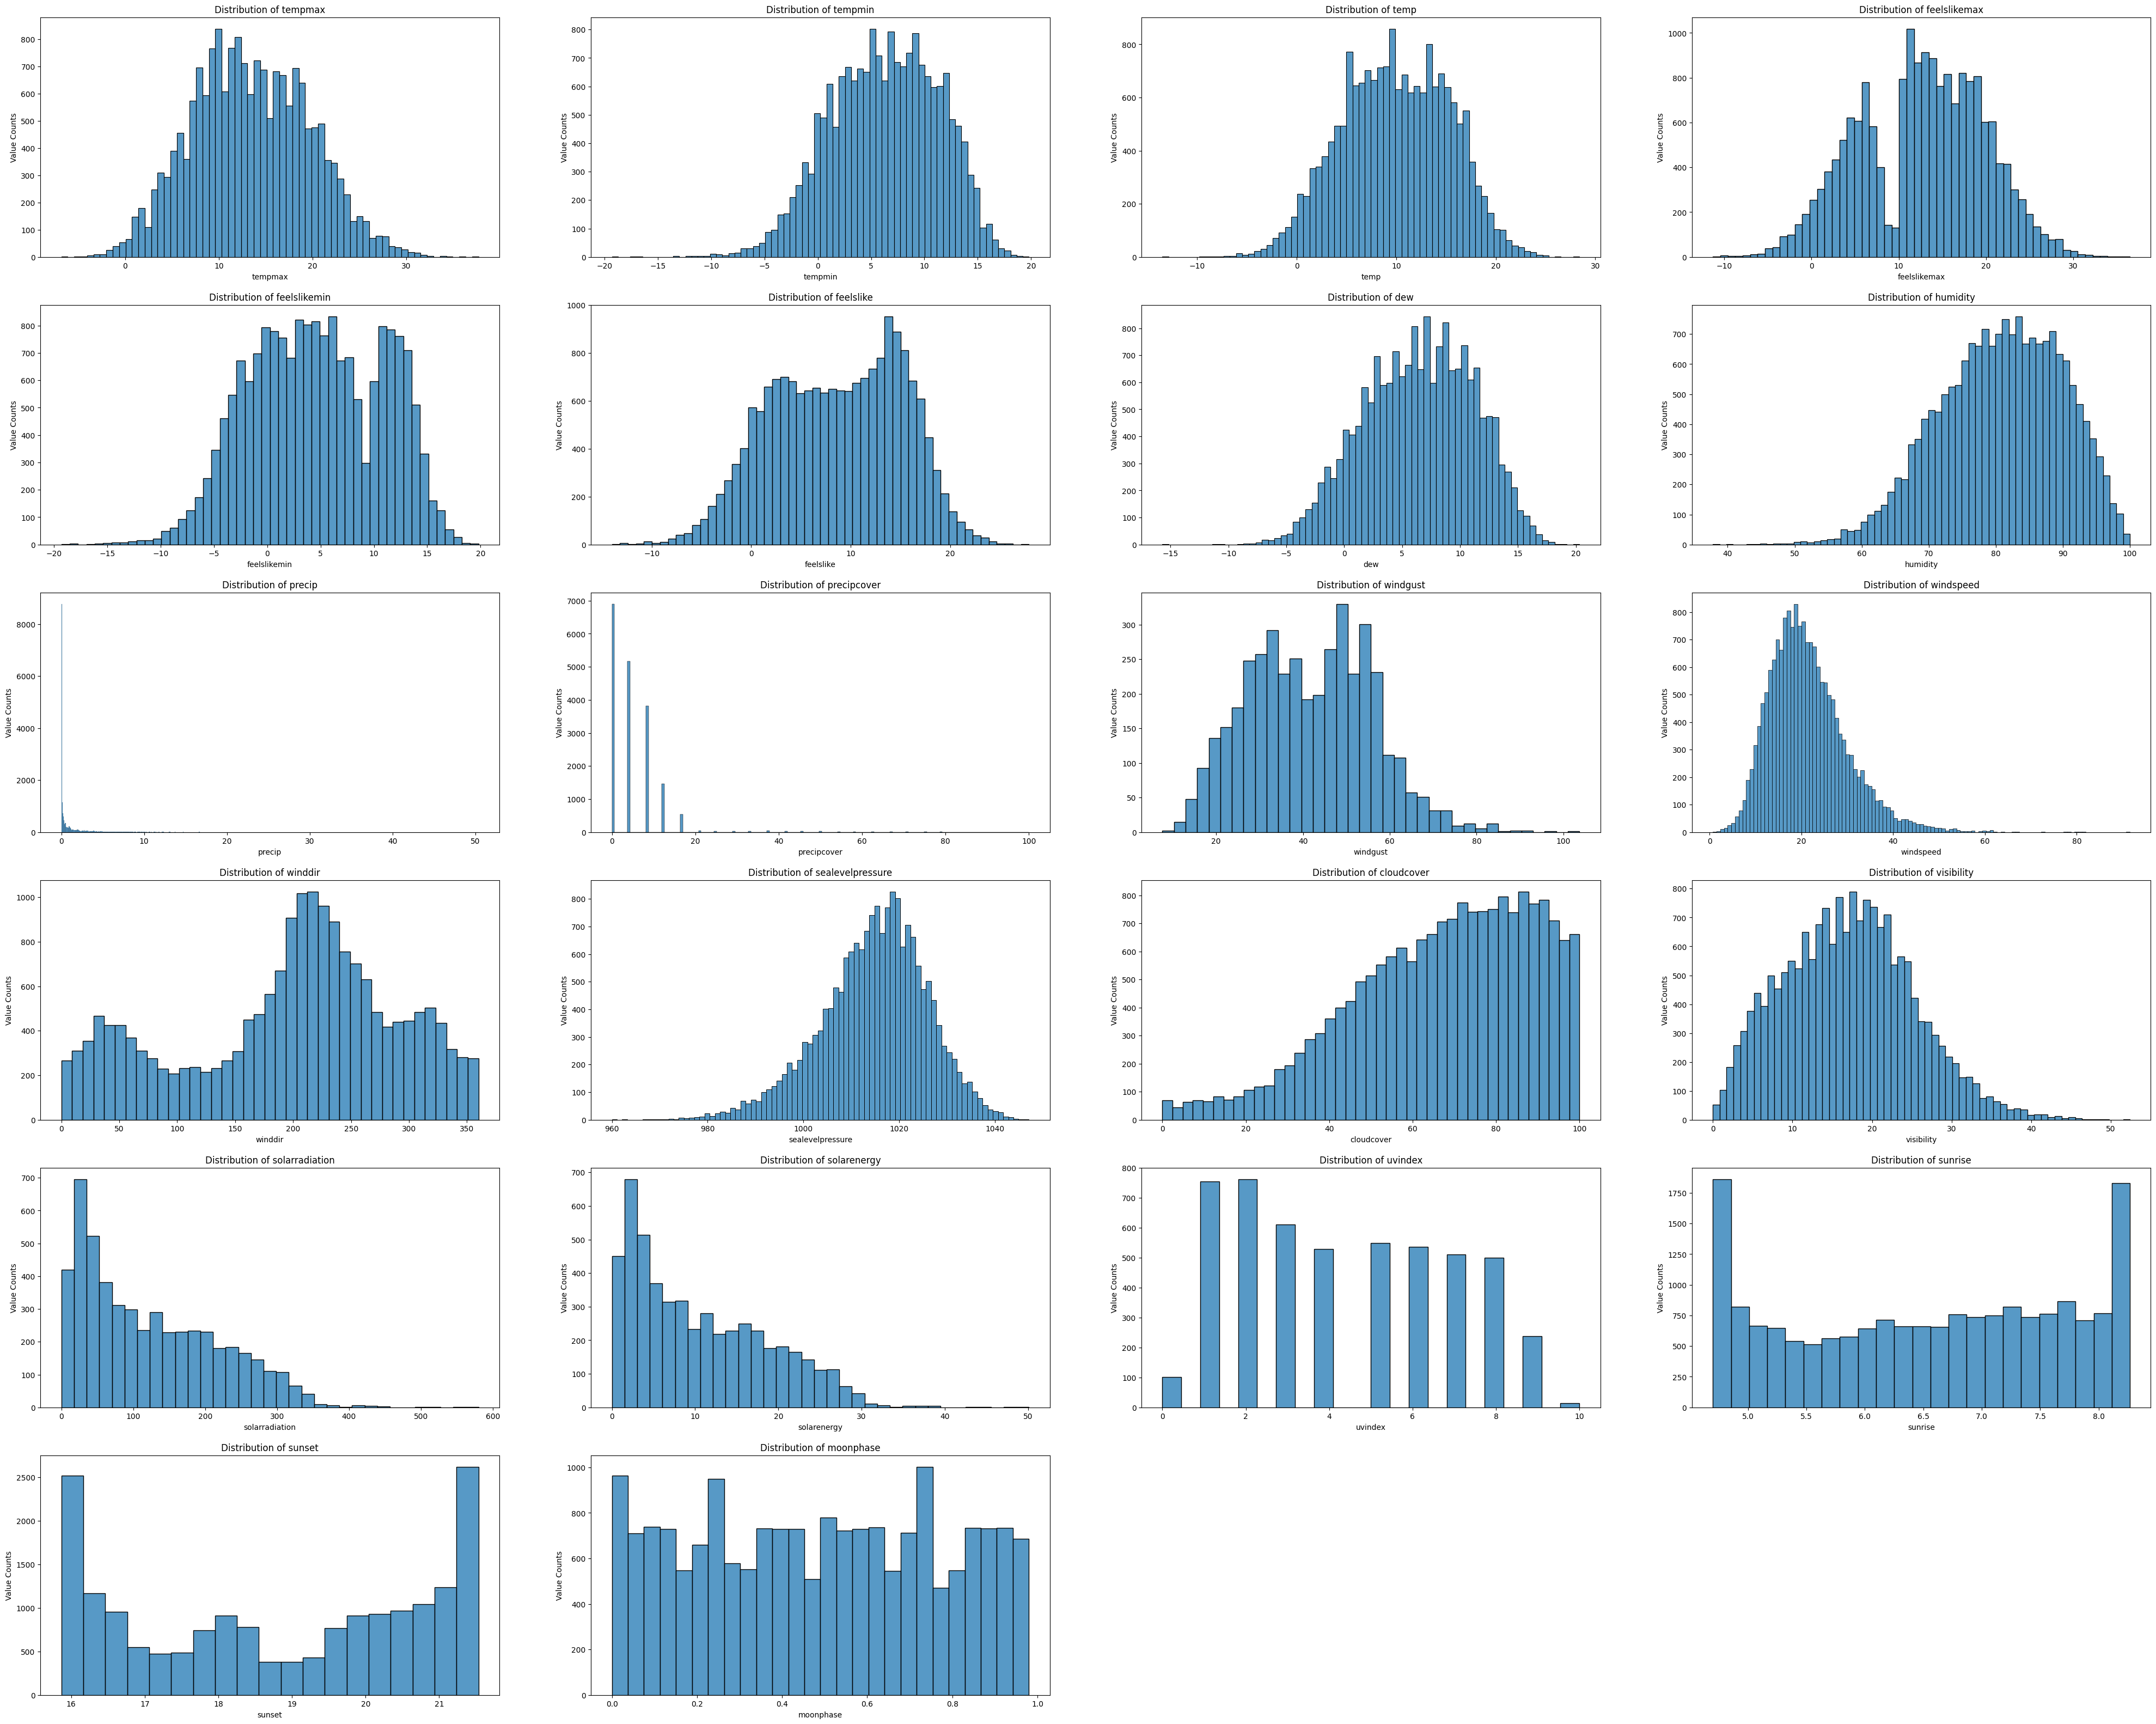

In [32]:
#Plot the data distribution of all numeric data
def plot_hist(data):    
    length = len(data.columns)
    plt.figure(figsize=(50, 40))
    for count, col in enumerate(data.columns):
          plt.subplot(length//4+1, 4, count+1)
          sns.histplot(data[col])
          plt.title(f'Distribution of {col}')
          plt.ylabel('Value Counts')
          plt.xlabel(col)
    plt.show()



plot_hist(numeric)

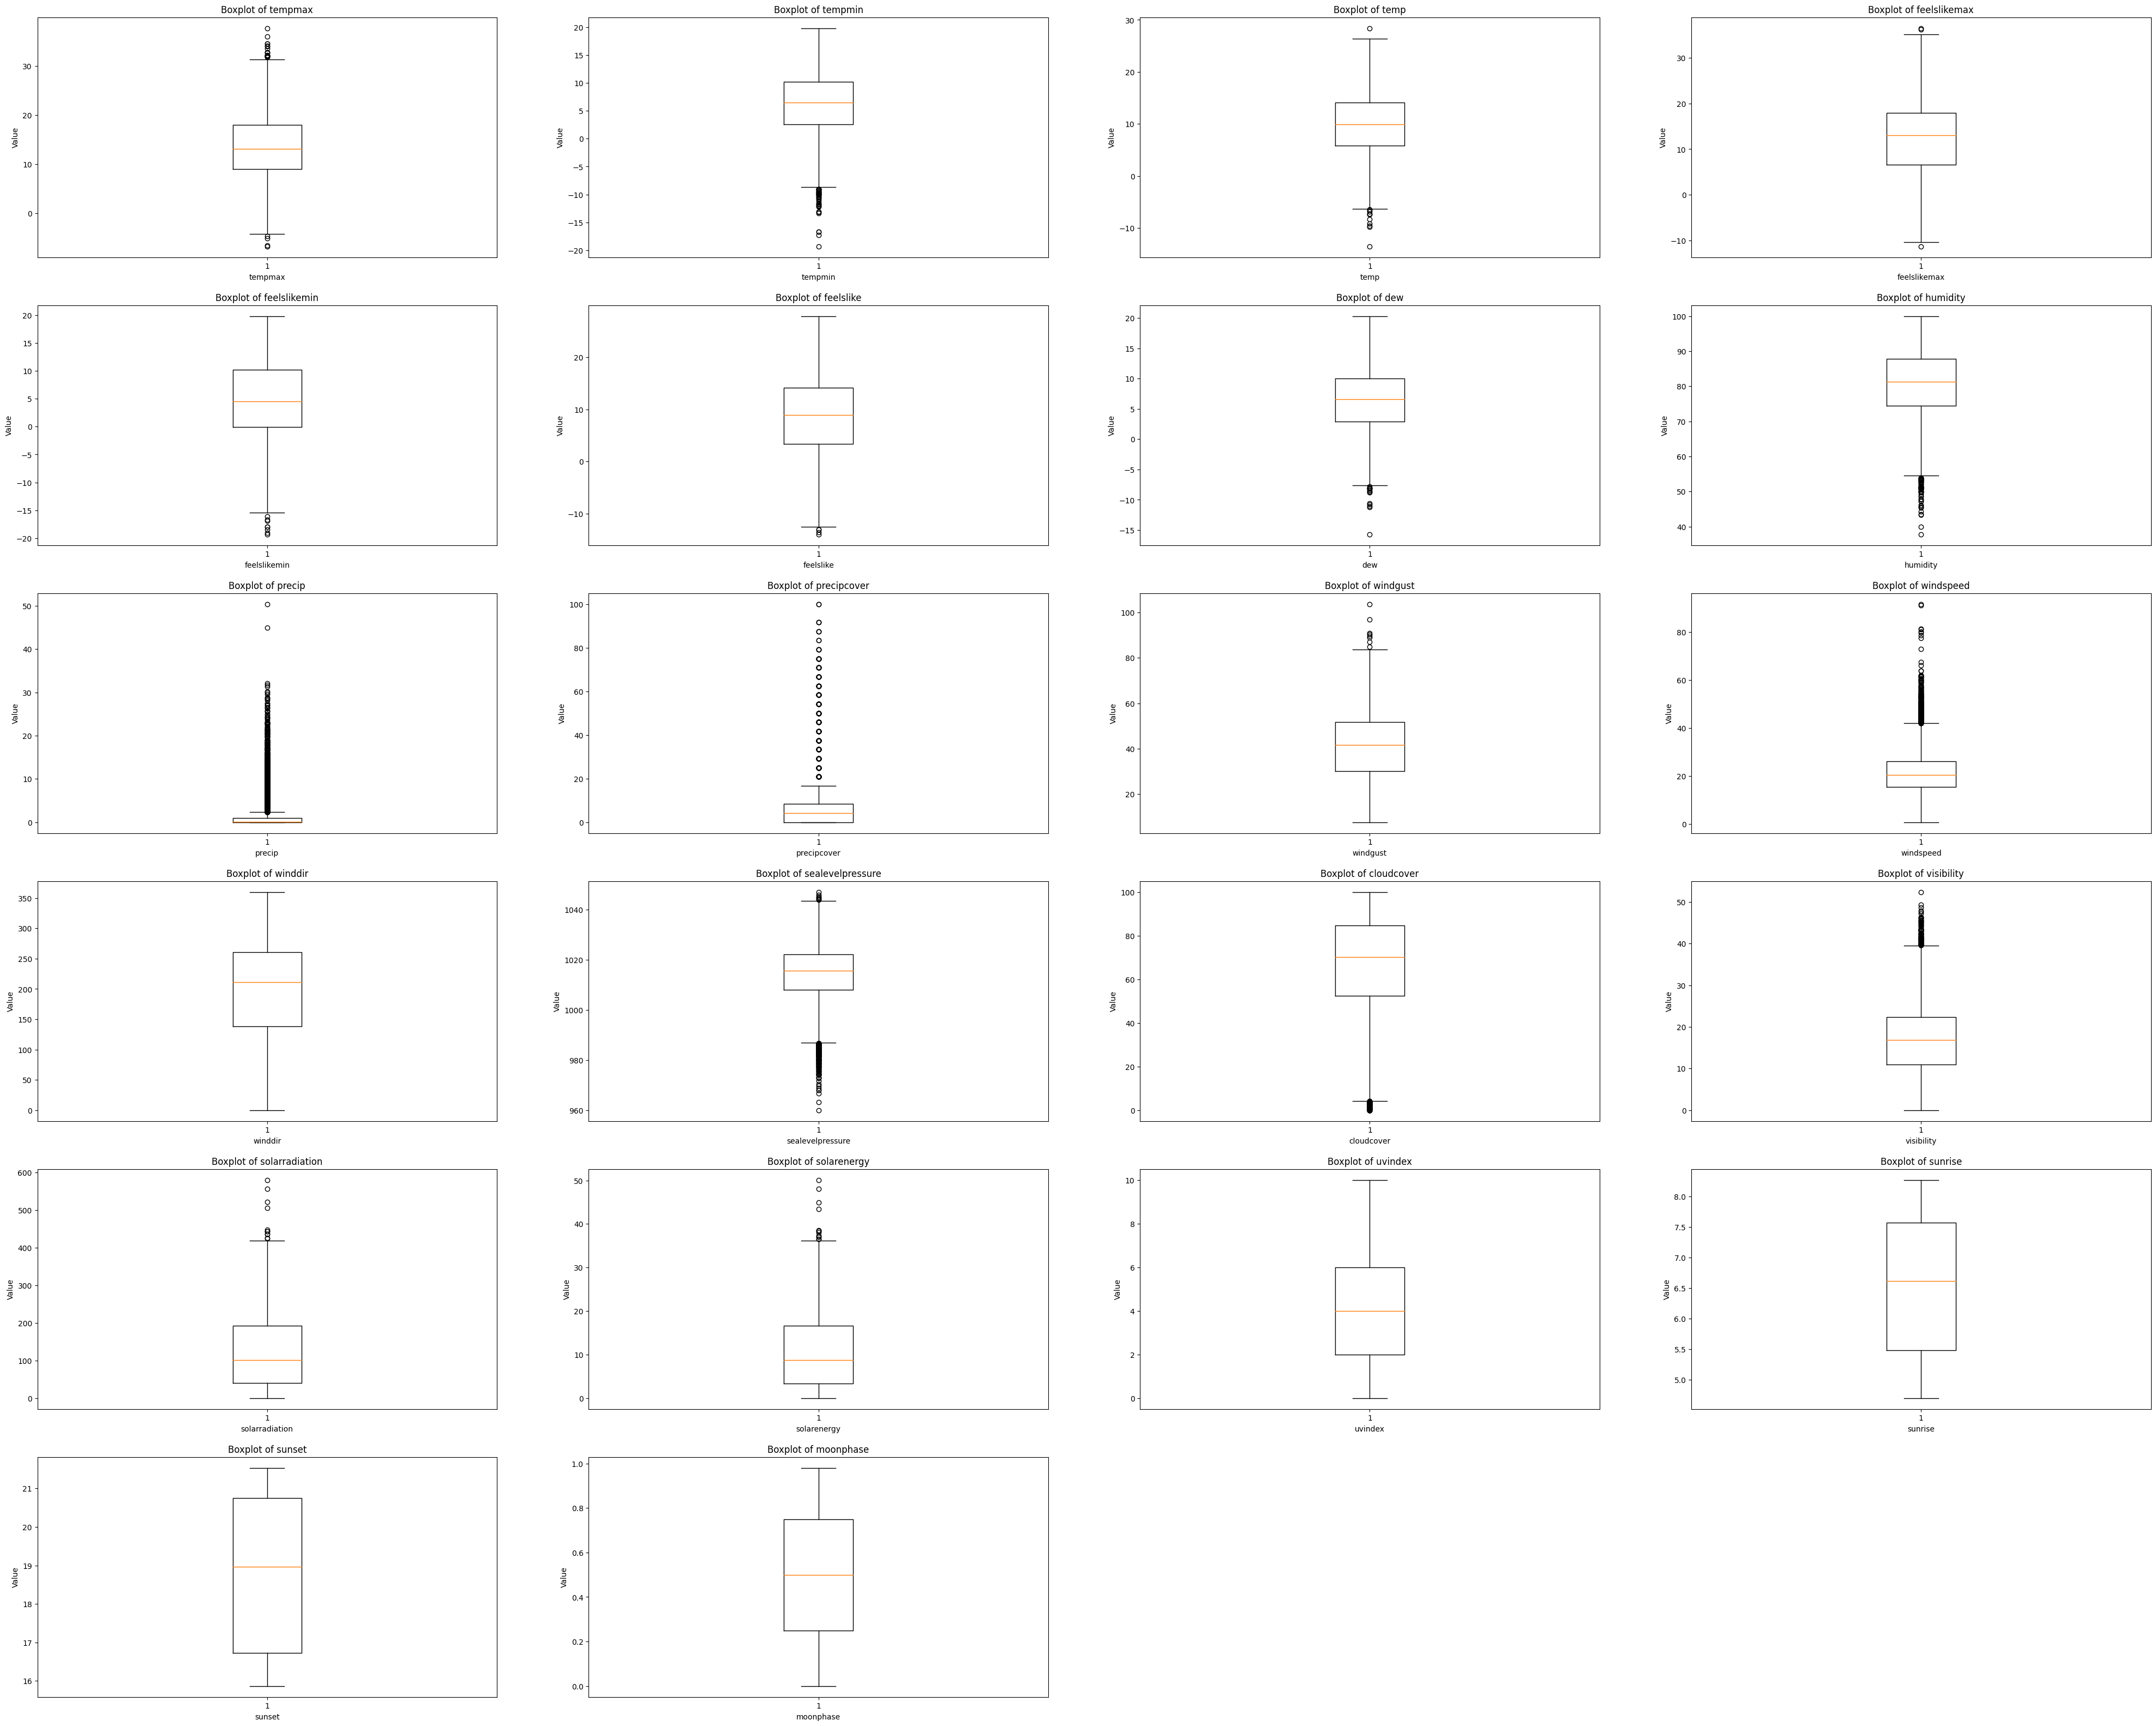

In [33]:
def box_plot(data):
    length = len(data.columns)
    plt.figure(figsize=(50, 40))
    for count, col in enumerate(data.columns):
        plt.subplot(length//4+1, 4, count+1)
        if data[col].isna().sum() == 0:
            plt.boxplot(data[col])
        else:
            plt.boxplot(data[col].dropna())
        plt.title(f'Boxplot of {col}')
        plt.ylabel('Value')
        plt.xlabel(col)
    plt.show()

box_plot(numeric)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5768\1103618100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conditions["conditions"] = conditions["conditions"].str.split(", ")


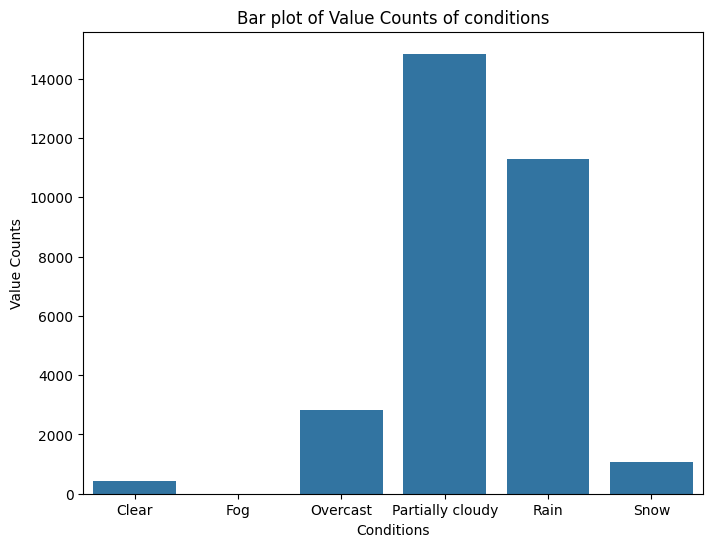

In [34]:
conditions = weather[["conditions"]]

conditions["conditions"] = conditions["conditions"].str.split(", ")
exploded = conditions.explode("conditions")
exploded.reset_index()
value_counts = exploded['conditions'].value_counts().sort_index()


plt.figure(figsize=(8, 6))
sns.barplot(value_counts)
plt.xlabel("Conditions")
plt.ylabel("Value Counts")
plt.title("Bar plot of Value Counts of conditions")
plt.show()

## 2.2 Bivariate Analysis

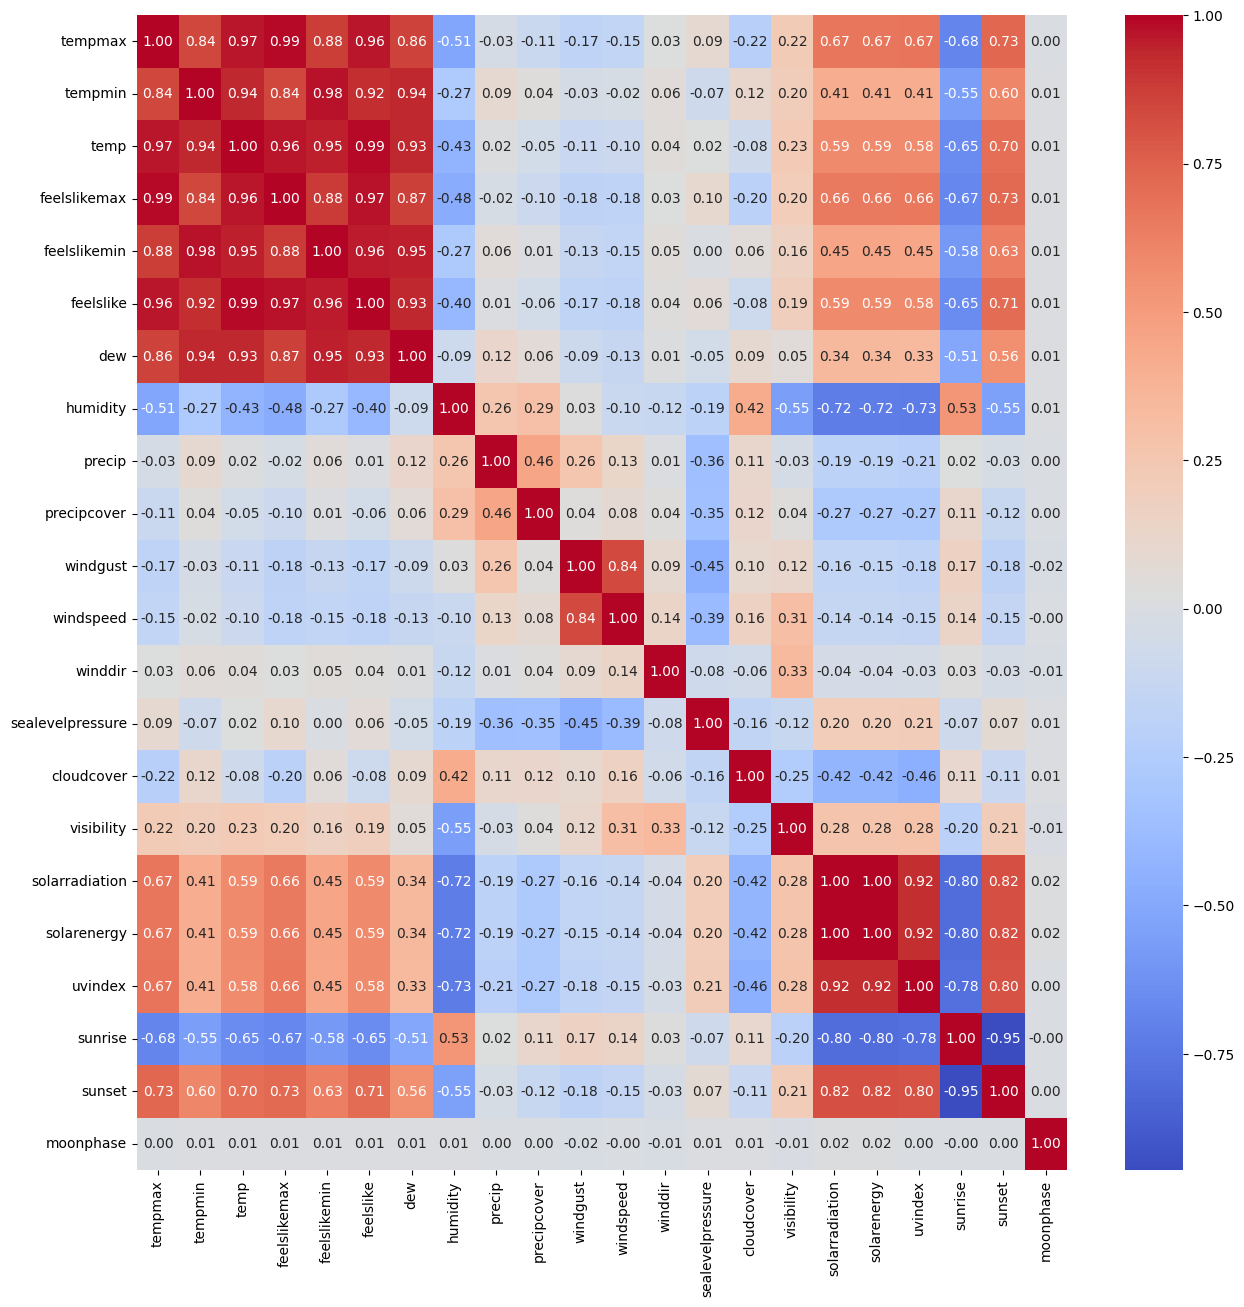

In [35]:
correlation = weather.select_dtypes(include="number").corr()


plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

- Temperature, feelslike and dewpoint are directly proportional
- Solaradiation, solarenery and UV Index are also directly proportional to each other, which is inversely proportional to humidity and cloud cover
- sea level pressure is inversely proportional to precipitation cover, windgust and wind speed
- wind direction, moon phase,  independent of every other aspects 
- 

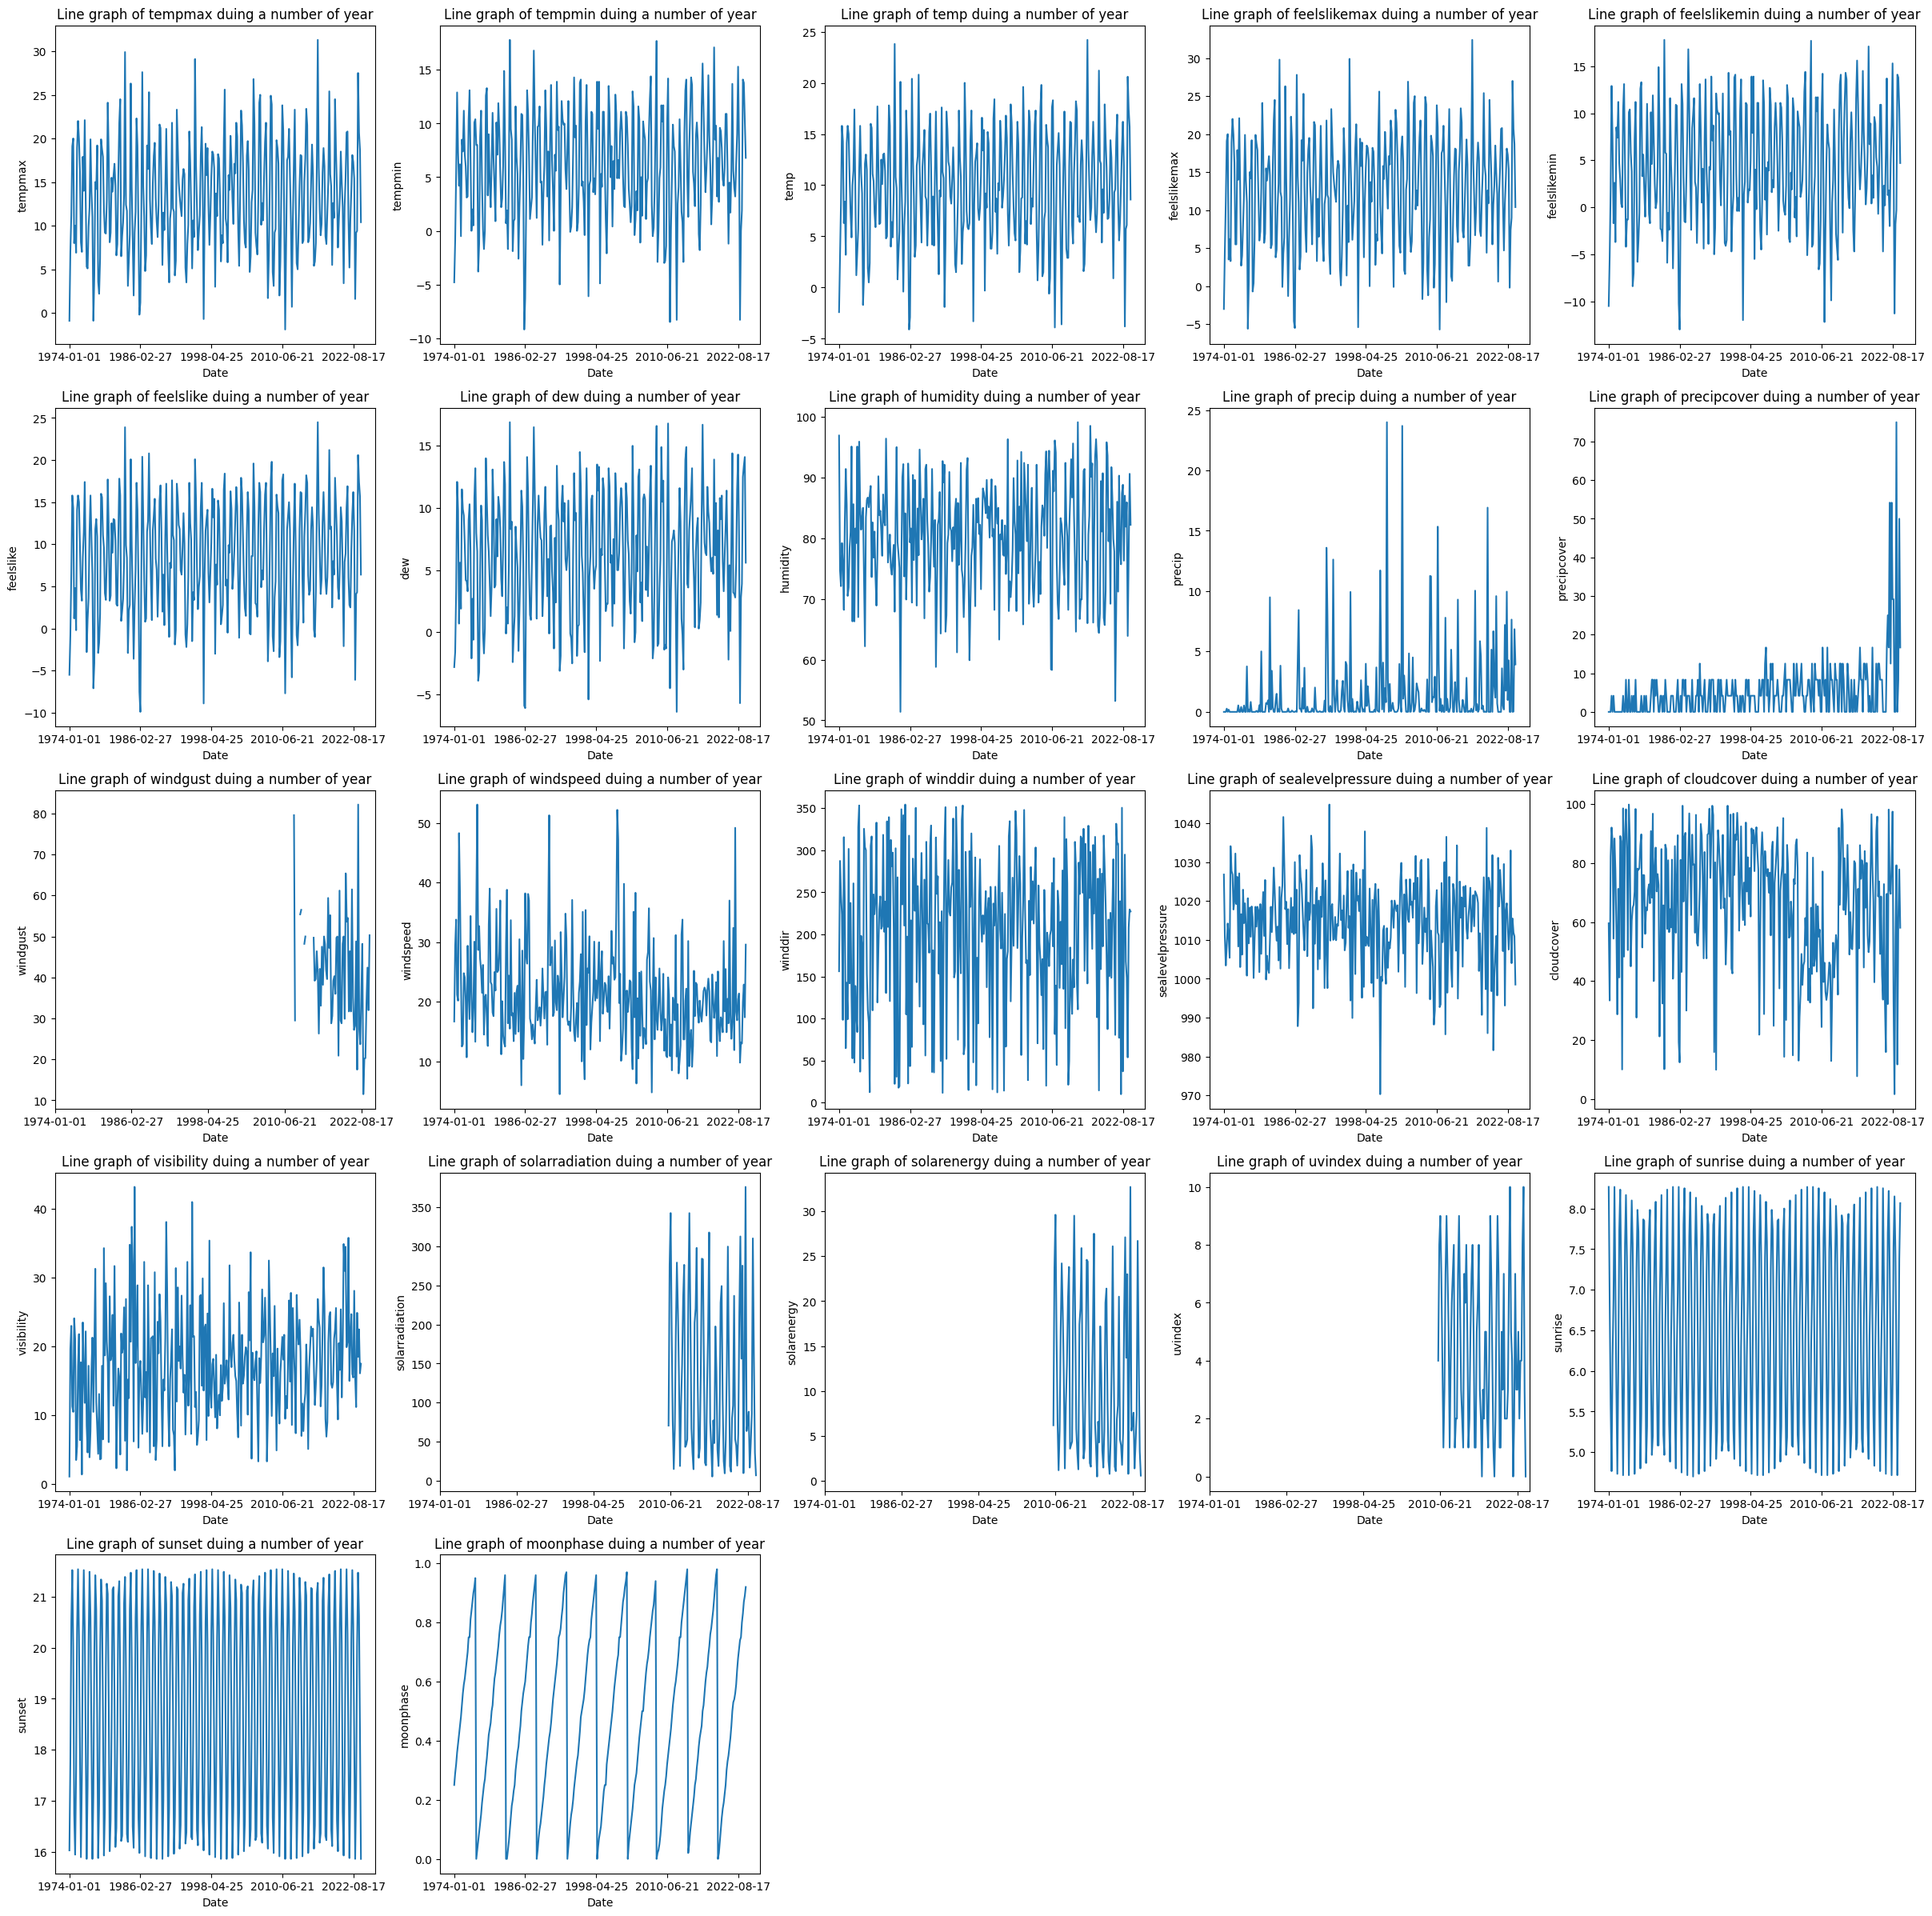

In [36]:
numeric = weather.drop(columns="conditions")[::len(weather)//300]
length = int(len(numeric.columns)**(1/2)) + 1
plt.figure(figsize=(30, 30))


for count, col in enumerate(numeric.columns):
    plt.subplot(length, length, count+1)
    plt.plot(numeric.index, numeric[col])
    
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.title(f"Line graph of {col} duing a number of year")
    years = int(weather.index[-1].split("-")[0])- int(weather.index[0].split("-")[0])
    plt.xticks(numeric.index[::years*365//(len(weather)//300)//4])



plt.show()

- Most data such as sunrise, sunset, mooonphase seems to be regular hence adding an attributes relating to dates like months/seasons, date might be useful in predicting those value
- Precipitation cover rises unexpectedly in 2020-2022
- Some attributes were not measured before about 2015 --> splitting these is necessary
- The loss is too noticable hence using an imputing methods might ruin the data

## 2.3 Data Cleaning

In [37]:
weather.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
datetime,,,,,,,,,,,,,,,,,,,,,,,
1974-01-01,-0.9,-4.8,-2.4,-3.0,-10.5,-5.5,-2.8,96.9,0.000,0.00,NaN,16.7,156.2,1026.8,59.6,1.1,NaN,NaN,NaN,8.266667,16.033333,0.25,Partially cloudy
1974-01-02,1.0,-3.9,-1.0,-3.6,-7.9,-5.2,-2.3,90.8,0.000,0.00,NaN,19.4,150.7,1014.6,85.5,4.9,NaN,NaN,NaN,8.266667,16.050000,0.30,Partially cloudy
1974-01-03,5.0,1.0,2.3,1.0,-3.5,-1.9,0.8,90.1,0.182,4.17,NaN,23.0,144.0,1003.0,99.1,6.3,NaN,NaN,NaN,8.266667,16.066667,0.33,"Snow, Rain, Overcast"
1974-01-04,9.0,4.9,7.2,4.8,1.0,2.9,6.0,92.1,0.182,4.17,NaN,45.0,160.3,1002.3,87.4,10.3,NaN,NaN,NaN,8.250000,16.100000,0.36,"Rain, Partially cloudy"
1974-01-05,9.9,7.9,8.5,6.7,2.9,4.5,6.7,88.6,3.036,8.33,NaN,48.2,158.9,997.7,91.8,13.6,NaN,NaN,NaN,8.250000,16.116667,0.40,"Rain, Overcast"


In [38]:
os.chdir("..")

### 2.3.1 Encoding/Binning

In [39]:
from tools.encode import OneHotEncoder, BinaryEncoder

binned = weather.copy()
binned["winddir_bin"] = pd.cut(binned["winddir"], bins=[-1, 45, 90, 135, 180, 225, 270, 315, 360], labels=["N", "NE", "E", "SE", "S", "SW", "W", "NW"])

encoded = OneHotEncoder(drop=True).transform(data=binned, columns=["conditions"], type_encode="multicategory", list_split=list_conditions, split_punc=", ")
encoded = OneHotEncoder(drop=True).transform(data=encoded, columns=["winddir_bin"], type_encode="category")
encoded = BinaryEncoder().transform(data=encoded, columns=["precip"], values=[0])


In [40]:
encoded

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions_Clear,conditions_Fog,conditions_Overcast,conditions_Partiallycloudy,conditions_Rain,conditions_Snow,winddir_bin_SE,winddir_bin_S,winddir_bin_SW,winddir_bin_W,winddir_bin_NE,winddir_bin_N,winddir_bin_NW,winddir_bin_E,precip_0
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1974-01-01,-0.9,-4.8,-2.4,-3.0,-10.5,-5.5,-2.8,96.9,0.000,0.00,NaN,16.7,156.2,1026.8,59.6,1.1,NaN,NaN,NaN,8.266667,16.033333,0.25,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1974-01-02,1.0,-3.9,-1.0,-3.6,-7.9,-5.2,-2.3,90.8,0.000,0.00,NaN,19.4,150.7,1014.6,85.5,4.9,NaN,NaN,NaN,8.266667,16.050000,0.30,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1974-01-03,5.0,1.0,2.3,1.0,-3.5,-1.9,0.8,90.1,0.182,4.17,NaN,23.0,144.0,1003.0,99.1,6.3,NaN,NaN,NaN,8.266667,16.066667,0.33,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0
1974-01-04,9.0,4.9,7.2,4.8,1.0,2.9,6.0,92.1,0.182,4.17,NaN,45.0,160.3,1002.3,87.4,10.3,NaN,NaN,NaN,8.250000,16.100000,0.36,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
1974-01-05,9.9,7.9,8.5,6.7,2.9,4.5,6.7,88.6,3.036,8.33,NaN,48.2,158.9,997.7,91.8,13.6,NaN,NaN,NaN,8.250000,16.116667,0.40,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,11.9,5.1,9.0,11.9,1.9,7.0,7.3,89.1,13.304,87.50,54.9,30.3,183.2,1002.0,85.1,16.7,3.4,0.4,0.0,8.266667,15.950000,0.50,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
2023-12-28,10.7,8.6,9.6,10.7,5.9,7.5,6.2,79.8,10.321,79.17,54.2,28.6,226.4,1000.2,79.7,16.7,10.5,0.9,1.0,8.266667,15.966667,0.55,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
2023-12-29,8.6,4.9,6.7,5.9,2.2,4.1,3.3,79.2,1.013,41.67,40.3,20.3,236.9,1004.5,49.7,30.6,10.6,0.8,1.0,8.266667,15.983333,0.58,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0


In [41]:
weather

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
datetime,,,,,,,,,,,,,,,,,,,,,,,
1974-01-01,-0.9,-4.8,-2.4,-3.0,-10.5,-5.5,-2.8,96.9,0.000,0.00,NaN,16.7,156.2,1026.8,59.6,1.1,NaN,NaN,NaN,8.266667,16.033333,0.25,Partially cloudy
1974-01-02,1.0,-3.9,-1.0,-3.6,-7.9,-5.2,-2.3,90.8,0.000,0.00,NaN,19.4,150.7,1014.6,85.5,4.9,NaN,NaN,NaN,8.266667,16.050000,0.30,Partially cloudy
1974-01-03,5.0,1.0,2.3,1.0,-3.5,-1.9,0.8,90.1,0.182,4.17,NaN,23.0,144.0,1003.0,99.1,6.3,NaN,NaN,NaN,8.266667,16.066667,0.33,"Snow, Rain, Overcast"
1974-01-04,9.0,4.9,7.2,4.8,1.0,2.9,6.0,92.1,0.182,4.17,NaN,45.0,160.3,1002.3,87.4,10.3,NaN,NaN,NaN,8.250000,16.100000,0.36,"Rain, Partially cloudy"
1974-01-05,9.9,7.9,8.5,6.7,2.9,4.5,6.7,88.6,3.036,8.33,NaN,48.2,158.9,997.7,91.8,13.6,NaN,NaN,NaN,8.250000,16.116667,0.40,"Rain, Overcast"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,11.9,5.1,9.0,11.9,1.9,7.0,7.3,89.1,13.304,87.50,54.9,30.3,183.2,1002.0,85.1,16.7,3.4,0.4,0.0,8.266667,15.950000,0.50,"Rain, Partially cloudy"
2023-12-28,10.7,8.6,9.6,10.7,5.9,7.5,6.2,79.8,10.321,79.17,54.2,28.6,226.4,1000.2,79.7,16.7,10.5,0.9,1.0,8.266667,15.966667,0.55,"Rain, Partially cloudy"
2023-12-29,8.6,4.9,6.7,5.9,2.2,4.1,3.3,79.2,1.013,41.67,40.3,20.3,236.9,1004.5,49.7,30.6,10.6,0.8,1.0,8.266667,15.983333,0.58,"Rain, Partially cloudy"


### 2.3.1 Missing data

In [42]:
weather.isna().sum()

tempmax                 0
tempmin                 0
temp                    0
feelslikemax            0
feelslikemin            0
feelslike               0
dew                     0
humidity                0
precip                  1
precipcover             0
windgust            14179
windspeed               0
winddir                 0
sealevelpressure        1
cloudcover              5
visibility              0
solarradiation      13149
solarenergy         13149
uvindex             13149
sunrise                 0
sunset                  0
moonphase               0
conditions              0
dtype: int64